In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [29]:
def df_filter(df):
    increasing_rows = df['max_co2'].diff() > 0

    increasing_rows.iloc[0] = True

    df_filtered = df[increasing_rows]

    return df_filtered

In [27]:
df_0 = pd.read_csv('csv/maxCO2_0.csv')
df_1 = pd.read_csv('csv/maxCO2_1.csv')
df_2 = pd.read_csv('csv/maxCO2_2.csv')
df_3 = pd.read_csv('csv/maxCO2_3.csv')
df_4 = pd.read_csv('csv/maxCO2_4.csv')
df_0_filter = df_filter(df_0).iloc[:,1:3]
df_1_filter = df_filter(df_1).iloc[:,1:3]
df_2_filter = df_filter(df_2).iloc[:,1:3]
df_3_filter = df_filter(df_3).iloc[:,1:3]
df_4_filter = df_filter(df_4).iloc[:,1:3]


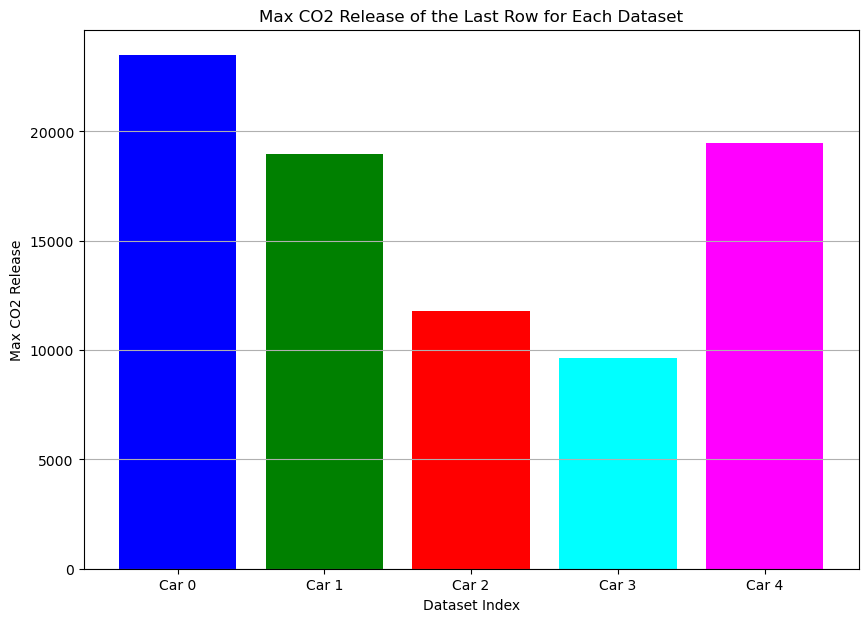

In [31]:
max_co2_values = [df_0_filter['max_co2'].iloc[-1], df_1_filter['max_co2'].iloc[-1], df_2_filter['max_co2'].iloc[-1], df_3_filter['max_co2'].iloc[-1], df_4_filter['max_co2'].iloc[-1]]

df_indices = ['Car 0', 'Car 1', 'Car 2', 'Car 3', 'Car 4']

plt.figure(figsize=(10, 7))
plt.bar(df_indices, max_co2_values, color=['blue', 'green', 'red', 'cyan', 'magenta'])

plt.title('Max CO2 Release of the Last Row for Each Dataset')
plt.xlabel('Dataset Index')
plt.ylabel('Max CO2 Release')
plt.grid(axis='y')

plt.show()

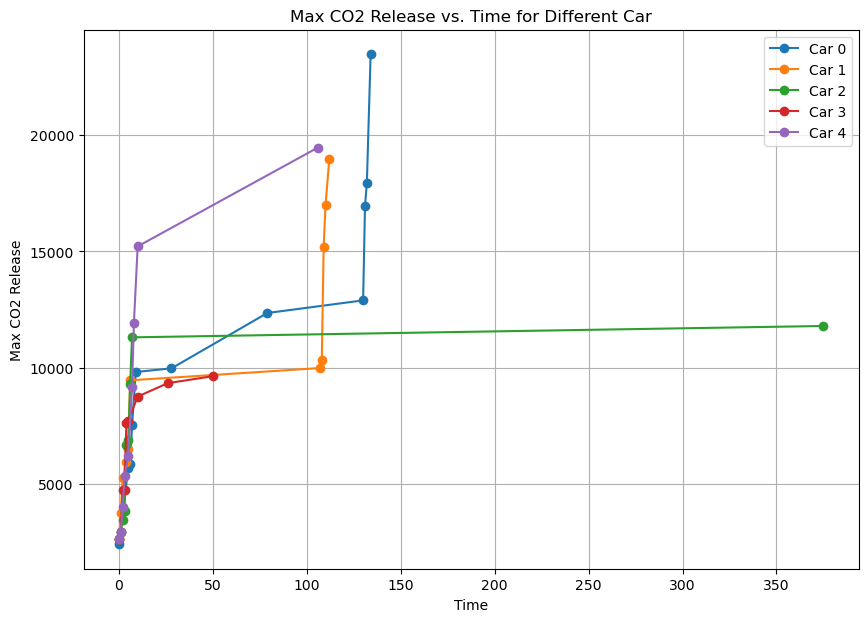

In [28]:
plt.figure(figsize=(10, 7))

plt.plot(df_0_filter['row_count'], df_0_filter['max_co2'], '-o', label='Car 0')
plt.plot(df_1_filter['row_count'], df_1_filter['max_co2'], '-o', label='Car 1')
plt.plot(df_2_filter['row_count'], df_2_filter['max_co2'], '-o', label='Car 2')
plt.plot(df_3_filter['row_count'], df_3_filter['max_co2'], '-o', label='Car 3')
plt.plot(df_4_filter['row_count'], df_4_filter['max_co2'], '-o', label='Car 4')

plt.title('Max CO2 Release vs. Time for Different Car')
plt.xlabel('Time')
plt.ylabel('Max CO2 Release')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
dataframes = [df_0_filter, df_1_filter, df_2_filter, df_3_filter, df_4_filter]
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
labels = ['Car 0', 'Car 1', 'Car 2', 'Car 3', 'Car 4']

# Setting up the plot
plt.figure(figsize=(10, 7))

for df, color, label in zip(dataframes, colors, labels):
    X = df['row_count'].values.reshape(-1, 1)
    y = df['max_co2'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    plt.scatter(df['row_count'], df['max_co2'], color=color, alpha=0.5, label=f'{label} Data')
    plt.plot(df['row_count'], y_pred, color=color, label=f'{label} Best Fit')


plt.title('Max CO2 Release and Best Fit Lines for Different Cars')
plt.xlabel('Time')
plt.ylabel('Max CO2 Release')
plt.legend()
plt.grid(True)
plt.show()

